In [2]:


from bs4 import BeautifulSoup
import requests
import pandas as pd




In [3]:
url = 'http://www.car-driver-paris.com/index.php/fr/tout-nos-services?gclid=CjwKCAiA2pyuBhBKEiwApLaIO2_nY1gBe6TKGPQqsubdftWwevV0M3WoTYgSZItMv8s756gd1lS7vhoC0c0QAvD_BwE'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
container = soup.find('div', class_='item-page')
print(container)


<div class="item-page">
<div class="content-links">
<ul>
</ul>
</div>
<p>Car<span style="font-size: small;"> driver Paris vous propose ses services de chauffeur privé en berline de luxe pour vos déplacements professionnels et privés, le tout en toute sécurité et dans un confort optimal. </span><br/><br/><span style="font-size: small;">Nos chauffeurs, dans une tenue irréprochable, sont bilingues et dotés d'une efficacité pour répondre à toutes vos exigences dans la confidentialité la plus absolue. </span><br/><br/><span style="font-size: small;">Pour votre bien être et un confort optimum, vous avez à disposition une bouteille d'eau, des confiseries et des magazines dans chacune de nos voitures.</span><br/><br/><span style="font-size: small;">Voici les différentes prestations proposées :<br/><br/></span></p>
<p><span><span><span style="color: #ffcc00;"><strong>TRANSFERTS GARES/AÉROPORTS</strong></span> <br/><br/>Pour vos transferts aéroport ou gare, quelque soit votre heure d'arrivée, vo

In [6]:
table = container.find('table')
print(table)

<table border="1" cellpadding="5" frame="box" style="width: 400px; border: 1px solid #ffffff;">
<tbody>
<tr align="left" valign="top">
<td>
<p>Au départ de Paris/</p>
<p>vers Paris</p>
</td>
<td style="text-align: center;"><img alt="" border="0" src="/images/Classe-E-s.jpg"/><br/>Berline "luxe"<br/>Mercedes class E</td>
<td style="text-align: center;"><span><img alt="" border="0" src="/images/Classe-S-s.jpg"/><br/>Berline "prestige"</span><br/><span>Mercedes class S</span></td>
<td style="text-align: center;"><img alt="" border="0" src="/images/Viano-s.jpg"/><br/>Van/Minibus/SUV</td>
</tr>
<tr>
<td align="left" valign="middle">
<p>Aéroport Roissy<br/><span style="line-height: 1.3em;">Charles de Gaulle<br/><br/></span></p>
</td>
<td align="center" valign="middle">85€</td>
<td align="center" valign="middle">175€</td>
<td align="center" valign="middle">130€</td>
</tr>
<tr>
<td align="left" valign="middle">Aéroport Orly<br/><br/><br/></td>
<td align="center" valign="middle">75€</td>
<td al

In [9]:
data_rows = []

# Parcourir toutes les lignes du tableau
for row in table.find_all('tr')[0:]:  # ajustez l'index selon si la première ligne est un en-tête ou non
    cells = row.find_all('td')  # ou 'th' si nécessaire pour les en-têtes
    data = [cell.text.strip() for cell in cells]  # Extraire le texte de chaque cellule
    data_rows.append(data)  # Ajouter la liste des données de la ligne à la liste des données


In [10]:
data_rows

[['Au départ de Paris/\nvers Paris',
  'Berline "luxe"Mercedes class E',
  'Berline "prestige"Mercedes class S',
  'Van/Minibus/SUV'],
 ['Aéroport RoissyCharles de Gaulle', '85€', '175€', '130€'],
 ['Aéroport Orly', '75€', '165€', '120€'],
 ['Gares Parisiennes\xa0Nord/Lyon/Est/Montparnasse', '65€', '100€', '90€']]

In [11]:
df = pd.DataFrame(data_rows)

In [13]:
df.columns = ['Au départ de Paris / vers Paris', 'Mercedes class E' , 'Mercedes class S' , 'Mercedes class V']


In [15]:
df = df.drop(0)
df

,Au départ de Paris / vers Paris,Mercedes class E,Mercedes class S,Mercedes class V
1,Aéroport RoissyCharles de Gaulle,85€,175€,130€
2,Aéroport Orly,75€,165€,120€
3,Gares Parisiennes Nord/Lyon/Est/Montparnasse,65€,100€,90€


In [16]:
df.to_excel('LOCATION_PARIS.xlsx', index=False)

In [25]:
import matplotlib.pyplot as plt

TypeError: no numeric data to plot

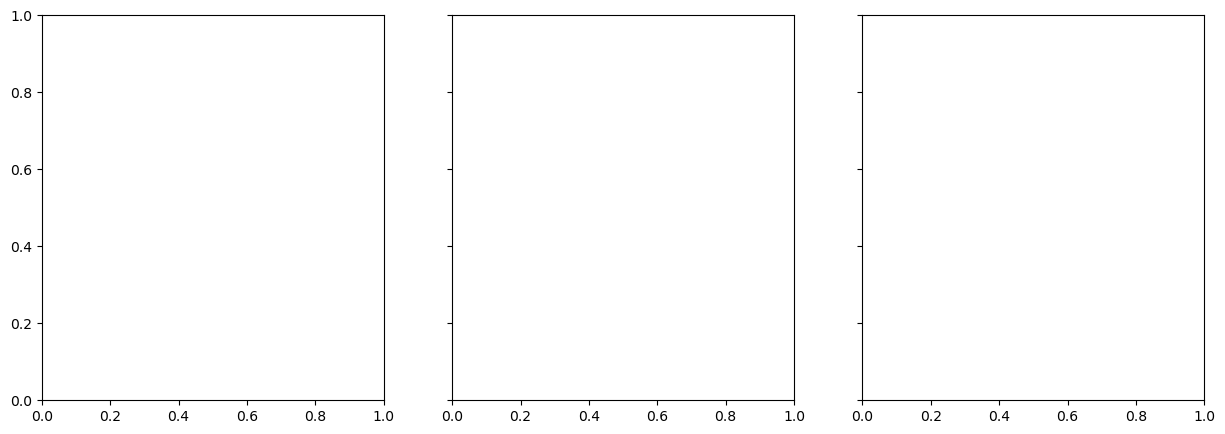

In [26]:
df.columns = df.columns.str.replace('€', '').str.strip()

# Afficher les graphiques à barres pour chaque type de Mercedes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, col in enumerate(df.columns[1:]):
    df.plot(x="Au départ de Paris / vers Paris", y=col, kind="bar", ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_ylabel("Prix (€)")
    axes[i].set_xlabel("Trajet")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [22]:
print(df.columns)


Index(['Au départ de Paris / vers Paris', 'Mercedes class E',
       'Mercedes class S', 'Mercedes class V'],
      dtype='object')


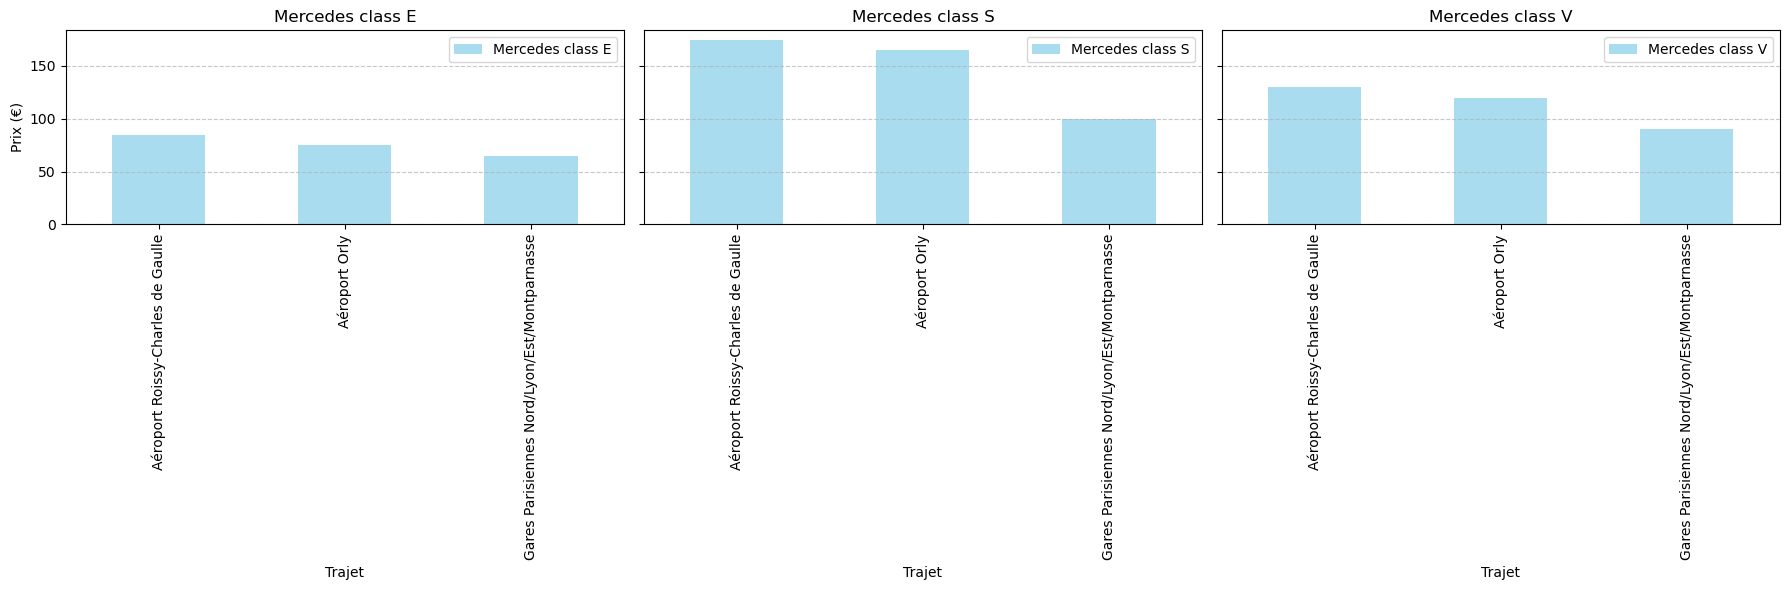

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir les données sous forme de dictionnaire
data = {
    "Trajet": ["Aéroport Roissy-Charles de Gaulle", "Aéroport Orly", "Gares Parisiennes Nord/Lyon/Est/Montparnasse"],
    "Mercedes class E": [85, 75, 65],
    "Mercedes class S": [175, 165, 100],
    "Mercedes class V": [130, 120, 90]
}

# Créer le DataFrame
df = pd.DataFrame(data)

# Supprimer les caractères spéciaux dans les noms de colonnes
df.columns = df.columns.str.replace('€', '').str.strip()

# Afficher un graphique à barres pour chaque type de Mercedes avec une taille agrandie
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Modifier la taille ici

for i, col in enumerate(df.columns[1:]):
    df.plot(x="Trajet", y=col, kind="bar", ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_ylabel("Prix (€)")
    axes[i].set_xlabel("Trajet")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
# Mercedes class E :

#Le prix pour le trajet "Gares Parisiennes Nord/Lyon/Est/Montparnasse" est le plus bas, suivi par "Aéroport Orly" et "Aéroport Roissy-Charles de Gaulle".
#Le prix le plus élevé est observé pour le trajet "Aéroport Roissy-Charles de Gaulle".
#Mercedes class S :

#Le trajet "Aéroport Roissy-Charles de Gaulle" a le prix le plus élevé, suivi par "Aéroport Orly" et "Gares Parisiennes Nord/Lyon/Est/Montparnasse".
#Le prix le plus bas est pour le trajet "Gares Parisiennes Nord/Lyon/Est/Montparnasse".
#Mercedes class V :

#Comme pour les autres classes, le prix est le plus bas pour le trajet "Gares Parisiennes Nord/Lyon/Est/Montparnasse" et le plus élevé pour "Aéroport Roissy-Charles de Gaulle".
#Le trajet "Aéroport Orly" a des prix intermédiaires pour cette classe.